In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df= pd.read_csv("owid-co2-data.csv")

In [3]:
df.head()

,country,year,iso_code,population,gdp,cement_co2,cement_co2_per_capita,co2,co2_growth_abs,co2_growth_prct,...,share_global_other_co2,share_of_temperature_change_from_ghg,temperature_change_from_ch4,temperature_change_from_co2,temperature_change_from_ghg,temperature_change_from_n2o,total_ghg,total_ghg_excluding_lucf,trade_co2,trade_co2_share
0,Afghanistan,1750,AFG,2802560.0,NaN,0.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,1751,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,1752,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,1753,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,1754,AFG,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
d= sns.load_dataset("diamonds")

In [5]:
d.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df.columns= [c.strip().lower().replace(" ","_")for c in df.columns]

In [7]:
columns_needed= ["country","year","co2","co2_per_capita","population","gdp","continent"]
cols= [c for c in columns_needed if c in df.columns]
df= df[cols].copy()

In [8]:
df.head()

,country,year,co2,co2_per_capita,population,gdp
0,Afghanistan,1750,NaN,NaN,2802560.0,NaN
1,Afghanistan,1751,NaN,NaN,NaN,NaN
2,Afghanistan,1752,NaN,NaN,NaN,NaN
3,Afghanistan,1753,NaN,NaN,NaN,NaN
4,Afghanistan,1754,NaN,NaN,NaN,NaN


In [9]:
for c in["co2","co2_per_capita","population","gdp"]:
    if c in df.columns:
        df[c]=pd.to_numeric(df[c],errors="coerce")

In [10]:
df= df.dropna(subset=["country","year"])
df= df[df["year"].between(1960,2024)]
df= df.sort_values(["country","year"]).reset_index(drop=True)

In [11]:
df.head()

,country,year,co2,co2_per_capita,population,gdp
0,Afghanistan,1960,0.414,0.046,9035048.0,1.303325e+10
1,Afghanistan,1961,0.491,0.053,9214082.0,1.314629e+10
2,Afghanistan,1962,0.689,0.073,9404411.0,1.336763e+10
3,Afghanistan,1963,0.707,0.074,9604491.0,1.363030e+10
4,Afghanistan,1964,0.839,0.085,9814318.0,1.387050e+10


In [12]:
annual = df.groupby("year", as_index= False).agg(
    total_co2=("co2","sum"),
    mean_co2=("co2","mean")
)

In [13]:
annual

,year,total_co2,mean_co2
0,1960,64219.551,295.942631
1,1961,64656.535,296.589610
2,1962,67131.266,305.142118
3,1963,70817.048,320.439131
4,1964,74638.325,333.206808
...,...,...,...
59,2019,237289.378,960.685741
60,2020,225815.581,914.233121
61,2021,237662.364,962.195806
62,2022,238962.609,967.459955


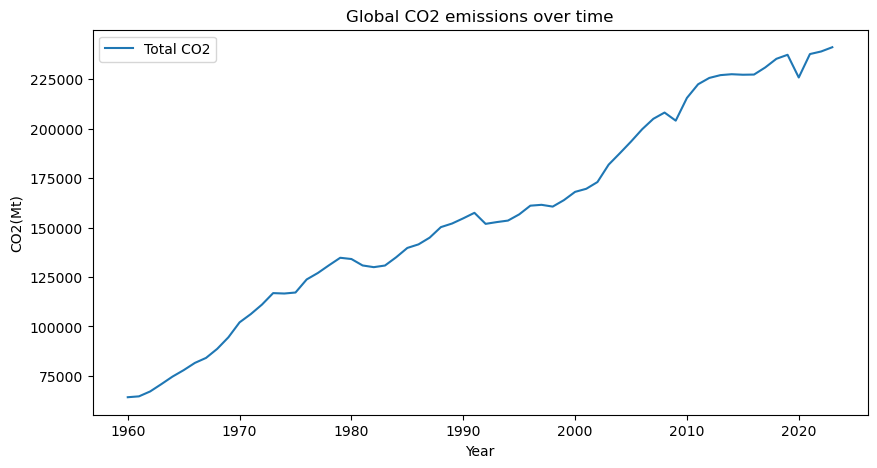

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(annual["year"], annual["total_co2"], label="Total CO2")
plt.title("Global CO2 emissions over time")
plt.xlabel("Year")
plt.ylabel("CO2(Mt)")
plt.legend()
plt.show()

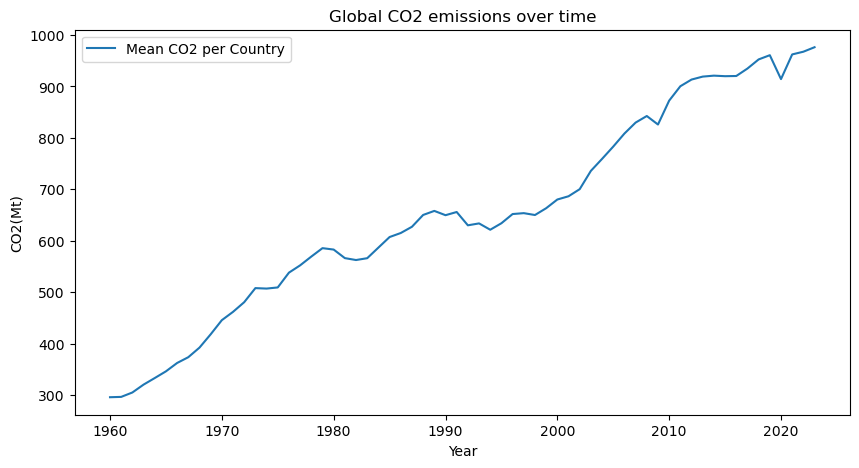

In [15]:
plt.figure(figsize=(10,5))
plt.plot(annual["year"], annual["mean_co2"], label="Mean CO2 per Country")
plt.title("Global CO2 emissions over time")
plt.xlabel("Year")
plt.ylabel("CO2(Mt)")
plt.legend()
plt.show()


In [16]:
latest_year = int(df["year"].max())

In [17]:
latest_year

2023

In [18]:
latest= df[df["year"]==latest_year].dropna(subset=["co2"])
latest

,country,year,co2,co2_per_capita,population,gdp
63,Afghanistan,2023,11.020,0.266,4.145476e+07,NaN
127,Africa,2023,1418.739,0.959,1.480771e+09,NaN
191,Africa (GCP),2023,1418.728,NaN,NaN,NaN
255,Albania,2023,5.144,1.830,2.811660e+06,NaN
319,Algeria,2023,178.133,3.859,4.616422e+07,NaN
...,...,...,...,...,...,...
15979,Wallis and Futuna,2023,0.031,2.691,1.139400e+04,NaN
16043,World,2023,37791.570,4.670,8.091735e+09,NaN
16107,Yemen,2023,10.035,0.255,3.939080e+07,NaN
16171,Zambia,2023,7.749,0.374,2.072397e+07,NaN


In [19]:
top10 = latest.sort_values("co2",ascending=False).head(10)
top10

,country,year,co2,co2_per_capita,population,gdp
16043,World,2023,37791.570,4.670,8.091735e+09,NaN
10688,Non-OECD (GCP),2023,25442.199,NaN,NaN,NaN
895,Asia,2023,22600.221,4.731,4.776660e+09,NaN
959,Asia (GCP),2023,19747.367,NaN,NaN,NaN
15531,Upper-middle-income countries,2023,17581.070,6.147,2.839926e+09,NaN
6335,High-income countries,2023,14014.305,9.957,1.259131e+09,NaN
3071,China,2023,11902.503,8.367,1.422585e+09,NaN
11136,OECD (GCP),2023,11232.802,NaN,NaN,NaN
1023,Asia (excl. China and India),2023,7635.394,3.985,1.839126e+09,NaN
10752,North America,2023,6123.550,10.128,6.087706e+08,NaN


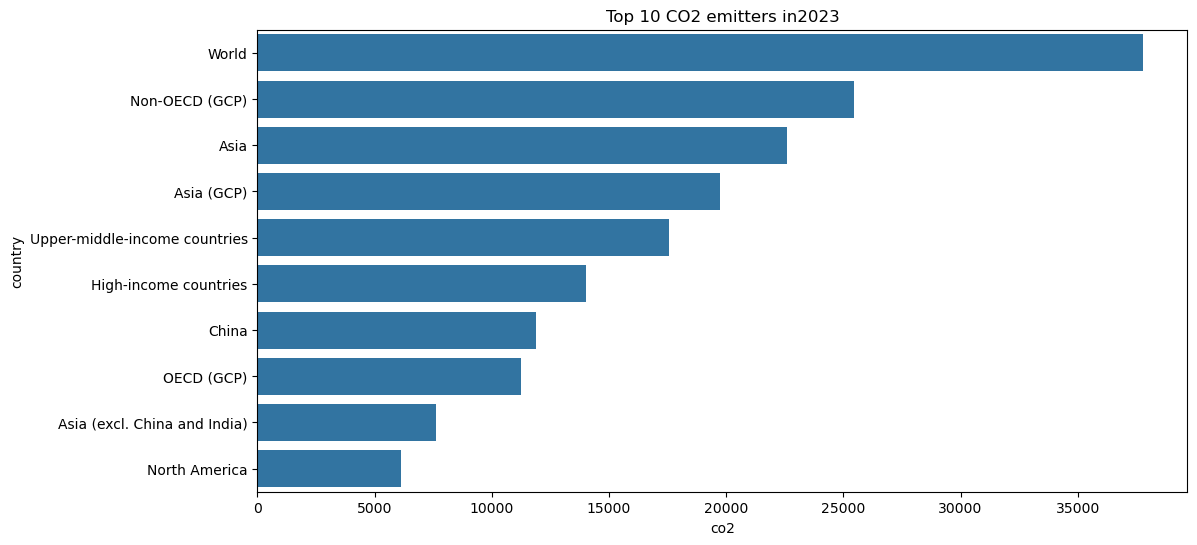

In [20]:
plt.figure(figsize=(12,6))
sns.barplot(data=top10, x="co2", y= "country")
plt.title(f"Top 10 CO2 emitters in{latest_year}")
plt.show()